In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Ethereum (ETH) [13.48.51, 29 Sep, 2021].csv')    

In [5]:
df.tail(24)  # return the last 24 rows

,Date,Price
4406,2021-09-28T11:00:00.000Z,2929.096863
4407,2021-09-28T12:00:00.000Z,2900.302437
4408,2021-09-28T13:00:00.000Z,2918.827489
4409,2021-09-28T14:00:00.000Z,2862.233395
4410,2021-09-28T15:00:00.000Z,2850.358015
4411,2021-09-28T16:00:00.000Z,2821.805883
4412,2021-09-28T17:00:00.000Z,2831.312398
4413,2021-09-28T18:00:00.000Z,2841.576359
4414,2021-09-28T19:00:00.000Z,2837.433715
4415,2021-09-28T20:00:00.000Z,2862.760689


In [6]:
df.shape  # return a tuple representing the dimensionality of the df

(4430, 2)

In [7]:
df1 = df.tail(24)

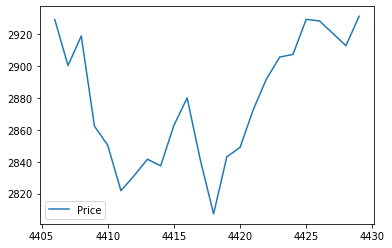

In [8]:
df1.plot(); # make plots of df1

### 1st Algorithm

In [9]:
df1 = df[df.index == df.index.max()]  # take the last value of our df
df2 = df[df.index == df.index.max()-24]  # take the value 1 day earlier
if float(df1.Price) < float(df2.Price):  # determine coin's trend on the fact that the price in df1 is higher than the price of df2 or not
    print('downs')
else:
    print('ups')

ups


### 2nd Algorithm

In [34]:
last_price = float(df[df.index == df.index.max()].Price)  # take the last Price value of our df
penultimate_price = (float(df[df.index == df.index.max()-1].Price))  # take the penultimate Price value of our df
if last_price < penultimate_price * 0.85 or last_price > penultimate_price * 1.15:  # exclude random value of last Price
    last_price = penultimate_price
price = last_price 
A = []  # create an empty array to store the results
count = 0  # iteration counter
for i in range(1, len(df)):  # analyze the price value for the last 24 hours or until the next latest price change
    tmp_price = (float(df[df.index == df.index.max()-i].Price))
    count += 1
    if tmp_price * 1.003 < price < tmp_price * 1.15:  # price rises if its value is much higher than tmp_price and its not a random value
        price = tmp_price
        A.append(1)
    elif tmp_price * 0.85 < price < tmp_price * 0.997:  # price falls if its value is much less than tmp_price and its not a random value
        price = tmp_price
        A.append(-1)
    else:
        A.append(0)
    if count >= 24 and sum(A) != 0:  # break the loop if the price has changed in the last 24 hours or find the last price change earlier
        break
if sum(A) >= 0:
    print('ups')
elif sum(A) < 0:
    print('downs')

ups
